# Exercise 7: K-means Clustering and Principal Component Analysis

In this exercise, has two major parts:
1. K-Means clustering used to compress an image.
2. Principal Component Analysis (PCA) to find low-dimensional representations of images.

Files provided by Coursera, located under `../exercises/ex1-ex8-octave/ex7`

- `ex7.m` - Octave/MATLAB script for the first exercise on K-means
- `ex7_pca.m` - Octave/MATLAB script for the second exercise on PCA
- `ex7data1.mat` - Example Dataset for PCA
- `ex7data2.mat` - Example Dataset for K-means
- `ex7faces.ma` - Faces Dataset
- `bird_small.png` - Example Image
- `displayData.` - Displays 2D data stored in a matrix
- `drawLine.m` - Draws a line over an exsiting figure
- `plotDataPoints.m` - Initialization for K-means centroids
- `plotProgresskMeans.` - Plots each step of K-means as it proceeds
- `runkMeans.m` - Runs the K-means algorithm
- `submit.m` - Submission script that sends your solutions to our servers

Files to complete:

- `pca.m` - Perform principal component analysis
- `projectData.m` - Projects a data set into a lower dimensional space
- `recoverData.m` - Recovers the original data from the projection 
- `findClosestCentroids.m` - Findclosestcentroids(usedin K-means)
- `computeCentroids.m` - Compute centroid means (used in K-means)
- `kMeansInitCentroids.m` - Initialization for K-means centroids

Workflow:

- Download latest Octave version of exercise from Coursera
- Complete code in exercise files following `ex7.pdf`
- Whenever an exercise part is finished
  - Check it with `ex7` and `ex7_spam` in Octave terminal
  - Create a submission token on Coursera (exercise submission page, it lasts 30 minutes)
  - Execute `submit` in Octave terminal
  - Introduce email and token
  - Results appear

**Overview of contents:**

0. Setup: `gnuplot`
1. Dataset Loading & Visualization
2. K-Means Clustering
3. Principal Component Analysis (PCA)

## 0. Setup: `gnuplot`

In [8]:
graphics_toolkit ("gnuplot");

In [9]:
%plot -b inline:gnuplot

## 1. Dataset Loading & Visualization

In [10]:
% Load an example dataset that we will be using
load('ex7data2.mat');

In [11]:
who

Variables visible from the current scope:

X    ans



In [12]:
size(X)

ans =

   300     2



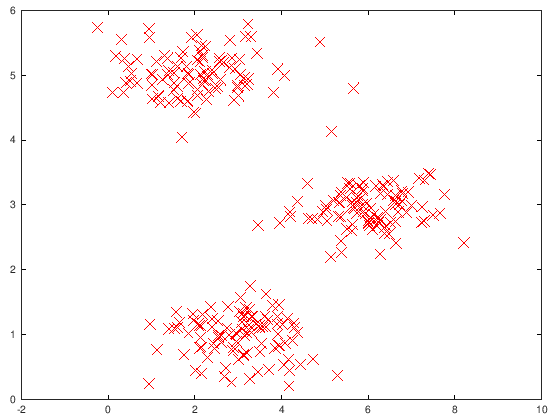

In [14]:
plot(X(:,1), X(:,2), 'rx', 'MarkerSize', 10);

## 3. K-Means Clustering

### 3.1 Implementing K-Means - `findClosestCentroids.m`, `computeCentroids.m`

In [65]:
function idx = findClosestCentroids_(X, centroids)
    % X: m x n; m: examples
    % centroids: K x n
    % idx: m x 1
    
    % Number of examples
    m = size(X,1);

    % Set K: number of centroids
    K = size(centroids, 1);

    % You need to return the following variables correctly.
    idx = zeros(size(X,1), 1);

    % Squared distances from centroid to each example (loop)
    dist2 = zeros(1,K);
    
    % Loop through all examples, all centroids
    for i = 1:m
        for k = 1:K
            d = X(i,:) - centroids(k,:);
            dist2(1,k) = d*d';
        end
        [v, ind] = min(dist2);
        idx(i,1) = ind;
    end
end

In [66]:
K = 3; % 3 Centroids
initial_centroids = [3 3; 6 2; 8 5];
idx = findClosestCentroids_(X, initial_centroids);

In [68]:
idx(1:3)

ans =

   1
   3
   2



In [86]:
function centroids = computeCentroids_(X, idx, K)

    % Useful variables
    [m n] = size(X);

    % You need to return the following variables correctly.
    centroids = zeros(K, n);

    for k = 1:K
        indices = find(idx == k);
        centroids(k,:) = mean(X(indices,:));
    end

end



In [87]:
centroids = computeCentroids_(X, idx, K);

In [88]:
centroids

centroids =

   2.4283   3.1579
   5.8135   2.6337
   7.1194   3.6167

